# Statistical Machine Learning assignment 3
### authors : 
        Casper van Elteren, Daniel Mingers

# Exercise 1 - Bayesian Linear Regression

## 1.1

We begin by computing $p(t, x, \textbf{x,t})$, using the results from exercise 2 week 8:

\begin{align*}
p(t \mid x, \boldsymbol{x},\boldsymbol{t})  &= \mathcal{N} (t \mid m(x), s^2(x)) \\
m(x)      &= \phi(x)^T \boldsymbol{m_n} &= N \beta \begin{pmatrix} 1 & x\end{pmatrix} \boldsymbol{S_N} \begin{pmatrix} \bar \mu_t \\ \bar \mu_{xt} \end{pmatrix}\\
s^2(x) &= \beta ^{-1} + \phi(x)^T \boldsymbol{S_N} \phi(x) &= \beta^{-1} + \begin{pmatrix} 1 & x \end{pmatrix} \boldsymbol{S_{N}} \begin{pmatrix} 1 \\ x \end{pmatrix}\\
\boldsymbol{S_{N}}^{-1} &= \begin{pmatrix} \alpha & 0 \\ 0 & \alpha \end{pmatrix} + N \beta \begin{pmatrix} 1 & \bar \mu_x \\ \bar \mu_x & \bar \mu_{xx} \end{pmatrix}
\end{align*}

We are given 
\begin{align*}
x  = \begin{pmatrix}
.4\\
.6\\
\end{pmatrix} \\
t  = \begin{pmatrix}
.05\\
-.35\\
\end{pmatrix}
\end{align*}

Hence, we compute :
\begin{align*}
    \bar \mu_t &= \frac{1}{N} \sum_n t_n &= -.15\\
    \bar \mu_x &= \frac{1}{N} \sum_n x_n &= .5\\
    \bar \mu_{xt} &= \frac{1}{N} x_n t_n &= -.095\\
    \bar \mu_{xx} &= \frac{1}{N} x_n^2  &= .26\\
\end{align*}
Confirmation with python 3.5:

In [10]:
# START PREAMBLE
import numpy as np
from pylab import *
# use latex interpreter
rc('text', usetex=True)
import scipy.stats as stats
import seaborn as sb
# END - PREAMBLE

ar = np.array; inv = np.linalg.inv
# given parameters
a = 2 ; b = 10
x = ar([0.4, .6])
t = ar([.05, -.35])

# set number of observed points
N = len(x)
# define mu parameters
mu_bar_t  = np.mean(t)
mu_bar_xt = np.mean(t * x)
mu_bar_x  = np.mean(x)
mu_bar_xx = np.mean(x**2)

print('mu_bar_t ={0}\nmu_bar_x = {1}\nmu_bar_xt ={2}\nmu_bar_xx= {3}'\
     .format(mu_bar_t, mu_bar_x, mu_bar_xt, mu_bar_xx))

mu_bar_t =-0.15
mu_bar_x = 0.5
mu_bar_xt =-0.095
mu_bar_xx= 0.26


Now we can compute $S_n$, $m(x)$, and $s^2(x)$:
    \begin{align*}
        \boldsymbol S_N^{-1} &= \begin{pmatrix}
                              22 & 10\\
                              10 & 7.2\\
                              \end{pmatrix} \\
         \vphantom{\frac11}\boldsymbol S_n      &= \begin{pmatrix}
                            .1233 & -.1712\\
                            -.1712 & .3767\\
                            \end{pmatrix}\\
        s^2(x) &= \beta^{-1} + \begin{pmatrix} 1 & x \end{pmatrix} \boldsymbol{S_{N}} \begin{pmatrix} 1 \\ x \end{pmatrix}\\
               &=  \vphantom{\frac11}\frac{1}{10} + \begin{pmatrix}1 & x\end{pmatrix} \begin{pmatrix}
                            .1233 & -.1712\\
                            -.1712 & .3767\\
                            \end{pmatrix} \begin{pmatrix} 1 \\ x \end{pmatrix}\\
               &=  \vphantom{\frac11}.1 + .1233 - .1712 x - .1712 x + .3767x^2 \\
               &=  \vphantom{\frac11}.2233 - .3425 x + .3767 x^2\\
       m(x)    &=  \vphantom{\frac11}N \beta \begin{pmatrix}1 & x\end{pmatrix} \boldsymbol{S_N} \begin{pmatrix} \bar \mu_t \\ \bar \mu_{xt} \end{pmatrix}\\
               &= 20  \begin{pmatrix}1 & x\end{pmatrix} \begin{pmatrix}
                            .1233 & -.1712\\
                            -.1712 & .3767\\
                            \end{pmatrix} \begin{pmatrix} -.15 \\ -.095 \end{pmatrix}\\
               &=  \vphantom{\frac11}\begin{pmatrix} 1 & x \end{pmatrix} \begin{pmatrix} -0.04452055\\-0.20205479 \end{pmatrix}\\
               &=   \vphantom{\frac11}-0.04452055  -0.20205479 x \\
        \end{align*}
    
                              

## 1.2

Note we must use the square root of $s^2(x)$ as this would be the standard deviation. Using the results from question 1 we plot:

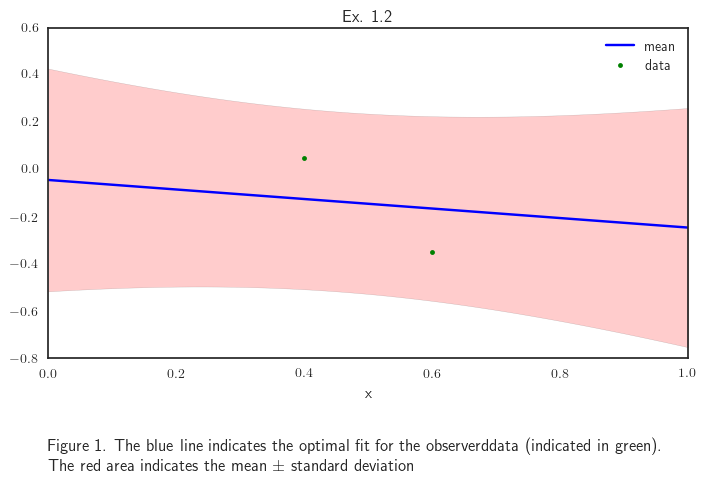

In [11]:
# see previous exercise for these results:
m_x  = lambda x: -0.04452055 -0.20205479 *x
s2_x = lambda x: .2233 -.3425 * x + .3767 * x**2

# domain over [0,1]
x_domain = np.linspace(0,1)

mu = m_x(x_domain)
std = np.sqrt(s2_x(x_domain))

# %matplotlib inline
# plot results
figNum = 1
fig , ax = subplots(1,1);
ax.set_position((.1, .3, .8, .6))
ax.plot(\
        x_domain, mu,\
        'b-', label = 'mean')

# draw +- std as an area like in bisschop
ax.fill_between(x_domain, mu + std, mu - std , \
                facecolor = 'red', alpha =.2)

capt_std = lambda figNum : 'Figure {0}. '.format(figNum)
cap = ('The blue line indicates the optimal fit for the observerd'
       'data (indicated in green). \nThe red area indicates'\
       ' the mean $\pm$ standard deviation')
fig.text(.1, .1, capt_std(figNum) + cap)
ax.plot(x, t,'g.', label = 'data');
ax.set_xlabel('x');
ax.legend()
ax.set_title('Ex. 1.2');
# savefig('Figures/12.png')
show()

## 1.3

We know that $p(w \mid , \alpha) = \mathcal{N}(\boldsymbol{w}, \mid 0, \alpha^{-1}, I)$; From week 8 exercise 2, we see that the posterior for $w$ is given as $p(w \mid t, x) = \mathcal{N} (w \mid m_n, S_n)$, with $m_N = \beta S_n \phi^T t$ and $S_n^{-1}  = \alpha I + \beta \phi^T \phi.$

Thus I will write code that will:
- Create multivariate normal object with $\mu = m_N$, $\Sigma = S_N$
- Draw 5 samples from this distribution and plot according to :$ y = w0 + w1 * x$

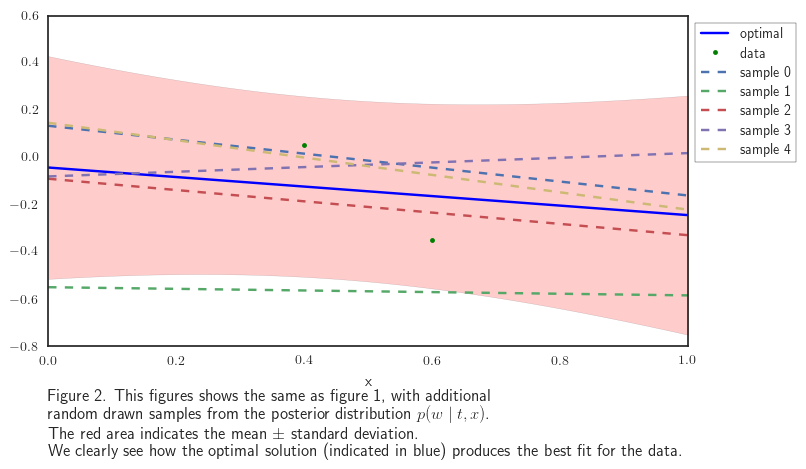

In [12]:
# load multivariate normal object
from scipy.stats import multivariate_normal as mv

phi = np.vstack((np.ones(x.shape), x))
# print(phi); assert 0
s_n = np.linalg.inv(a * np.eye(N) + b * phi.T.dot(phi))
m_n = b * s_n .dot(phi.T.dot(t))

# create object for p(w | 0, a^-1 I)

# p_w = mv([0,0], 1/a * np.eye(N))
p_w = mv(m_n, s_n)

# draw 5 random samples
random_w = p_w.rvs(5).T
# create inline plot function for the line
plot_w = lambda x, w0, w1: w0 + x * w1

# open figure and start plotting
fig = figure()
ax = fig.add_subplot(111)

figNum = 2
ax.set_position((.1, .3, .8, .6))

# plot mean and standard deviation
# mean
ax.plot(\
        x_domain, m_x(x_domain),\
        'b-', label = 'optimal');
# standard deviation; plotting as an area
ax.fill_between(x_domain, mu + std, mu-std, \
                facecolor = 'r', alpha = .2)
# plot the data
ax.plot(x, t, 'g.', label = 'data')

# create 5 straight lines
[ax.plot(\
         x_domain, plot_w(x_domain, w[0], w[1]),\
         '--', label = 'sample {}'.format(idx)\
        )\
        for idx, w in enumerate(random_w.T)];
    
# plot formatting
ax.legend(loc = 0,\
          ncol = 1,\
          frameon = True,\
          framealpha = 1,\
          bbox_to_anchor = (1., 1.));
capt = ' This figures shows the same as figure 1, with additional \n'\
'random drawn samples from the posterior distribution $p(w \mid t, x)$.\n'\
'The red area indicates the mean $\pm$ standard deviation.'\
' \nWe clearly see how the optimal solution (indicated in blue)'\
' produces the best fit for the data. '
fig.text(.1,.1, capt_std(figNum) + capt)
ax.grid('off');
sb.set_style('white');
# ax.set_ylim([-2,2])
ax.set_xlabel('x');
show()  

# Exercise 2 - Logistic Regression

## 1.1
The Hessian for a 1D case (which we have now) is simply the second derivative ($f''(x)$). Hence, we can write down the expression : 
\begin{align*}
f(x) &=  \vphantom{\frac11}\sin(x)\\
x^{(n+1)} &=  \vphantom{\frac11} x^{(n)} - H^{-1} \nabla f(x^{(n)})\\
          &=  \vphantom{\frac11} x^{(n)} - \left(- \left(\sin(x)\right)^{-1}\right) \cos(x)\\
          &=  \vphantom{\frac11} x^{(n)} + \frac{\cos(x^{(n)})}{\sin(x^{(n)})} \\
          &=  \vphantom{\frac11} x^{(n)} - \frac{f'(x^{(n)})}{f''(x^{(n)})}
\end{align*}

An implementation of the Newton-Rhapson method in python 3.5 looks like:

In [13]:
import numpy as np
rc('text', usetex=True)

def newton_sin(x0, maxiter = 100, threshold = 1e-10):
    i = 0
    # keep on searching until the stop condition:
    stop_cond = True
    while stop_cond:
        # update according to (2) from the pdf
        x = x0 + np.cos(x0) / np.sin(x0)
        # if the difference between one iteration
        # smaller than threshold stop algorithm
        if abs(x - x0) < threshold:
            stop_cond = False
        else:
            x0 = x
        # fail safe if no optimum can be found
        if i > maxiter:
            print('fail to converge')
            stop_cond = False
        i += 1
    return x,i
result1, iters1 = newton_sin(x0 = 1)
result2, iters2 = newton_sin(x0 = -1)
print('local extremum for starting point  1:  {0}, required iterations: {1}'.format(result1, iters1))
print('local extremum for starting point -1: {0}, required iterations: {1}'.format(result2, iters2))
print('are we close to pi/2? {0} and {1}'.format(np.abs(result1)==np.pi/2, np.abs(result2)==np.pi/2))

local extremum for starting point  1:  1.57079632679, required iterations: 4
local extremum for starting point -1: -1.57079632679, required iterations: 4
are we close to pi/2? True and True


We see that the algorithm starting from 1 finds $\pi / 2$ and starting from $-1$ finds $-\pi/2$. This makes sense as the Newton - Rhapson method can find the extreme values, e.g. minima and maxima. Which would yield that the first derivative at those points ($\nabla f(x))$ is zero. The algorithm will halt at extreme values (can be local). 

## 1.2

In [14]:
data = np.array([[.3, .44, .46, .6], [1, 0, 1, 0]])
w0 = np.array([1. ,1. ]).T
# print(data.shape)
# define sigmoid function:
sigmoid = lambda x: 1 / (1 + np.exp(-x))                  # bisschop 4.59


def RLS(y,\
        t,\
        phi,\
        w0, \
        threshold = 1e-10, \
        maxiter = 100,\
        cond = True):
    '''
    Performs reweighted least squares
    '''
    i = 0; # keep track of stop conditions
    # keep iterating until the difference is smaller than 
    # pre-set threshold
    while cond: 
        y = sigmoid(phi.dot(w0))                          # bisschop 4.87
        R = np.diag(np.multiply(y, (1 - y)))              # bisschop 4.98   
        Z = phi.dot(w0) - np.linalg.pinv(R).dot(y - t)    # bisschop 4.100
        w = np.linalg.inv(\
          phi.T.dot(R.dot(phi))).dot(phi.T.dot(R.dot(Z))) # bisschop 4.99
        # stop conditions:
        if np.sum(abs(w - w0)) < threshold: cond = False;
        if i > maxiter : cond = False
        # update w0 with new point
        w0 = w; i += 1
    return w0, i
# value , targets
y, t = data
# create feature vector
phi = np.stack((np.ones(y.shape), y))
# run Reweighted Least squares
w0, i = RLS(y, t, phi.T, w0)
# print output
print('Iterations = {0}, w = {1}'.format(i,w0.T))
# print(sum(phi.T.dot(w0))

Iterations = 7, w = [  9.78227684 -21.73839298]


A decision boundary is found by realizing that $w^T \phi = 0$, which we can solve for:

\begin{align*}
w^T \boldsymbol \phi &=0\\
 \vphantom{\frac11}w_1 1 + w_2 \phi &= \phi\\
 \vphantom{\frac11}\frac{w_1}{w_2}  &= -\phi \\
 \vphantom{\frac11}\frac{9.78227684}{21.73839298} &=0.4499999999539984 = .45 = \phi
\end{align*}

Note : $\boldsymbol \phi = [1, \phi]^T$

## 2.1

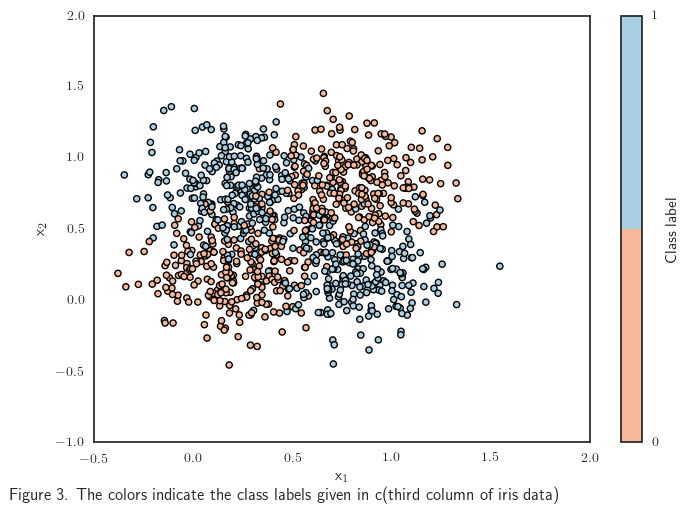

In [16]:
iris_data = np.loadtxt('iris_data.txt')
x = iris_data[:,:2]; c = iris_data[:,-1]


# set colormaps for labels and probabilities [future exercises]
from matplotlib.colors import ListedColormap
cmap = sb.color_palette('RdBu', 2)
cmap_class = ListedColormap(cmap)
cmap = sb.color_palette('RdBu', 100)
cmap_prob = ListedColormap(cmap)

# open figure and plot the data 
figNum = 3
fig, ax = subplots(1,1);
ax.set_position((.1, .3, .8, .6))
p    = ax.scatter(x[:,0 ], x[:,1],\
                  s = 20,\
                  c = c,\
                  cmap = cmap_class, \
                  edgecolor = 'k',\
                  linewidth = 1\
                   )

capt =  ('The colors indicate the class labels given in c'\
  '(third column of iris data)')
fig.text(.02,.02,\
    capt_std(figNum) + capt)
ax.set_xlabel('x_1'); 
ax.set_ylabel('x_2');
cb = fig.colorbar(p); cb.set_label('Class label')
cb.set_ticks([0,1])
# savefig('Figures/21.png')
show()

In the current space we cannot draw a straight line such that the data points are correctly separated. However, we will see in ex. 4 and 5 that logistic regression does work if we move the data to a different space where we can fit a straight line through the data. Thus it is not per se a question whether logistic regression is applicable to a specific dataset, but to find a transformation that yields a linearly separable image of the dataset. However, for the current space it will not be a good idea to apply vanilla logistic regression.

## 2.2

In [17]:
# initalize w0
w0 = np.array([0,0,0])
# construct phi [1, data]
phi = np.hstack((np.ones( (x.shape[0],1) ) ,  x)).T

# probability before optimization
prob_classified_before_opt = sigmoid(w0.dot(phi))
c1 = np.mean(prob_classified_before_opt[c == 1])
c2 = 1 - c1

print((\
'The class probabilities  before optimization are :\n'\
' class 1 = {0}\n class 2 = {1}').\
format(c1, 1-c1))


The class probabilities  before optimization are :
 class 1 = 0.5
 class 2 = 0.5


As we will see in part 2.3, the algorithm is written flexibly enough not to require adaptation.

## 2.3 

cross-entropy :
 before  optimizing = 693.14718056
 after optimizing = 692.969359483
 difference = 0.177821


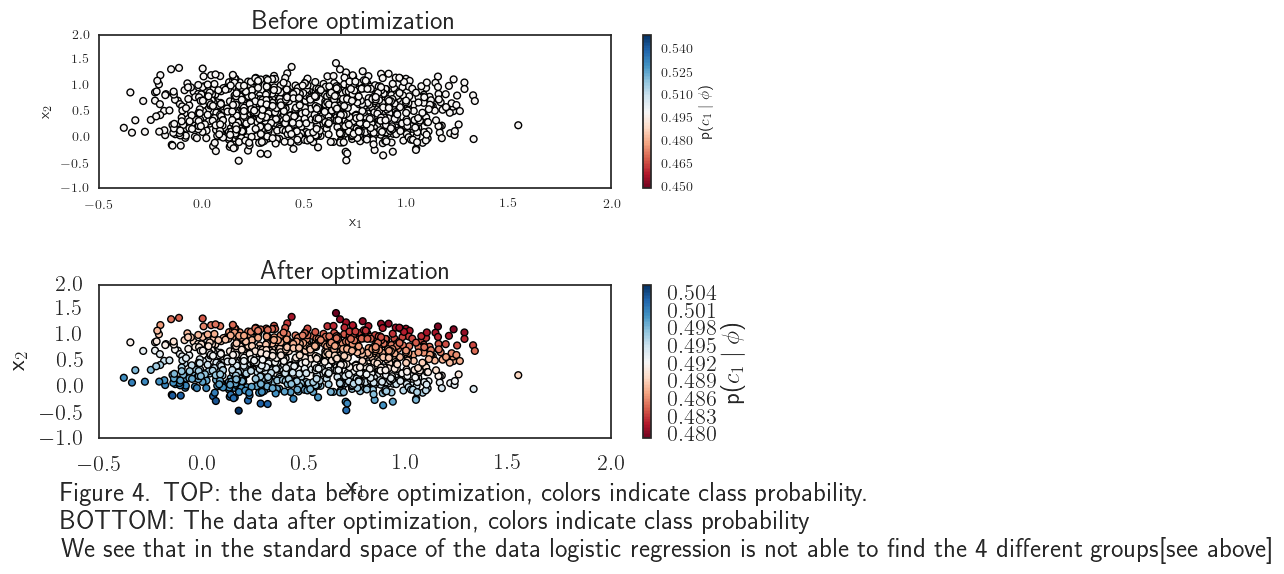

In [18]:
# run reweighted least squares
w, i = RLS(x, c, phi.T, w0)

# create feature matrix with bias
tmp = np.ones((1, x.shape[0]))
phi = np.vstack([tmp, x.T])


# after optimization
prob_classified_after_opt =  sigmoid(w.dot(phi))

# equation 4.90 Bisschop
cross_entropy = lambda y, t:\
        -np.sum( t * np.log(y) + (1 - t) * np.log(1 - y))
# cross entropy with w = [0,0,0]
cross_entropy_before_opt = \
cross_entropy(prob_classified_before_opt, c)

# cross entropy after optimization using IRS
cross_entropy_after_opt  = cross_entropy(prob_classified_after_opt, c)
print(('cross-entropy :\n'\
       ' before  optimizing = {0}\n'
       ' after optimizing = {1}\n'\
       ' difference = {2:f}')\
      .format(cross_entropy_before_opt, \
              cross_entropy_after_opt,\
              cross_entropy_before_opt - cross_entropy_after_opt))

# plot before optimization
fig = figure(); 
figNum = 4
ax = fig.add_subplot(2,1,1)
ax.set_position((.1, .1, .8, .6))
p = ax.scatter(x[:,0], x[:,1],\
               c = prob_classified_before_opt,\
               s = 24,\
               cmap = cmap_prob,\
               edgecolor = 'k',\
               linewidth = 1);

cb = fig.colorbar(p) 
cb.set_label('p($c_1 \mid \phi$)')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
sb.set_context('poster')
ax.set_title('Before optimization')

# plot after optimization
ax = fig.add_subplot(2,1,2)
p = ax.scatter(x[:,0], x[:,1],\
               c = prob_classified_after_opt,\
               s = 24,\
               cmap = cmap_prob,\
               edgecolor = 'k',\
               linewidth = 1);

ax.set_position((.1, .1, .8, .6))
cb = fig.colorbar(p) 
cb.set_label('p($c_1 \mid \phi$)')
capt = 'TOP: the data before optimization, colors indicate class probability.\n'\
'BOTTOM: The data after optimization, colors indicate class probability\n'\
'We see that in the standard space of the data logistic regression is not able to find the 4 different groups[see above]'
fig.text(.1, -.05, capt_std(figNum) + capt)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
sb.set_context('poster')
ax.set_title('After optimization')

tight_layout()
# savefig('Figures/22.png')
show()

The cross-entropy did decrease a little bit from  693.1471805599454 to 692.969359482537. But as we can see the binary classifier still assigns around chance level the data points. As indicated in 2.1, there is no simple linear line that separates the 4 blobs in different classes. 

## 2.4

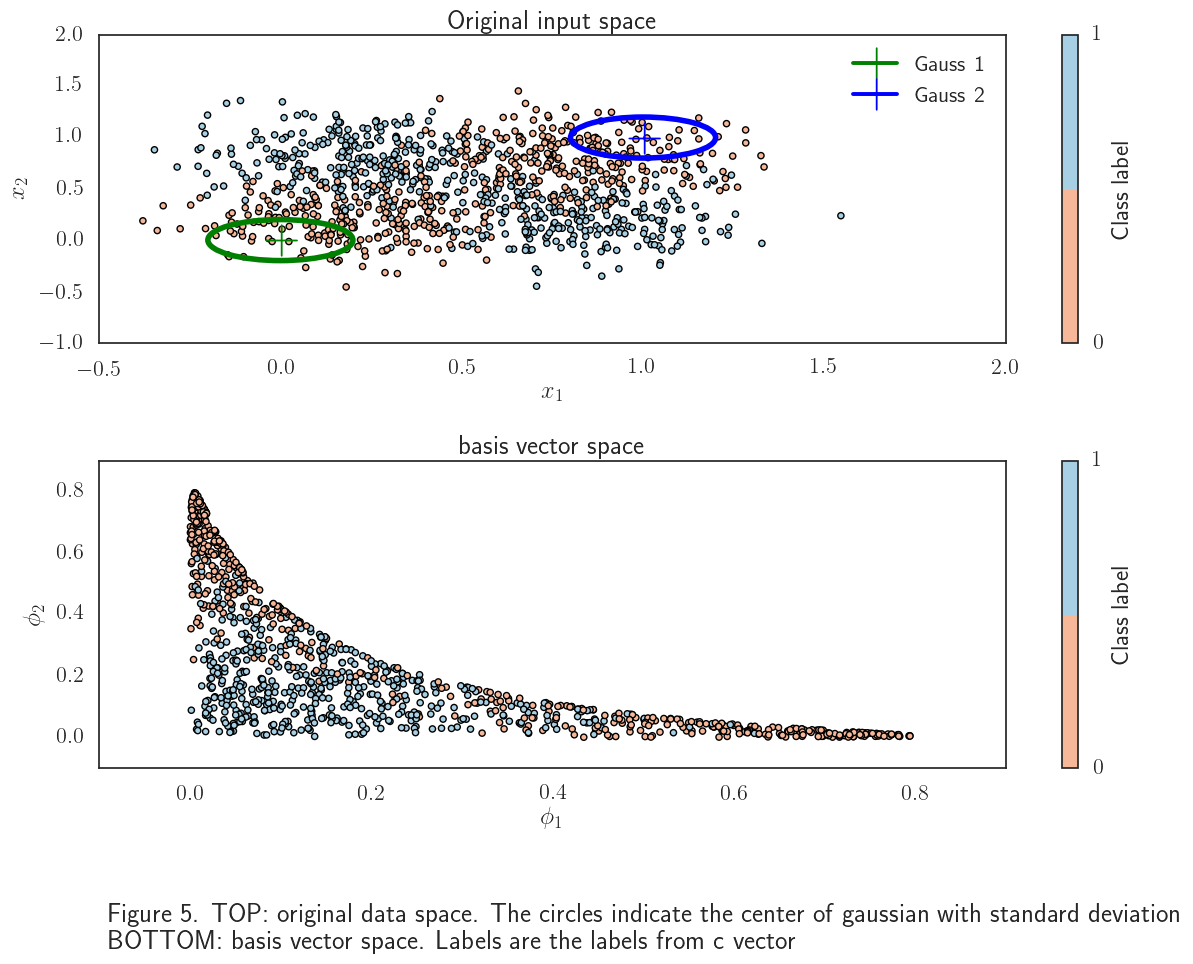

In [19]:
 from scipy.stats import multivariate_normal as mv
create_basis_vector = lambda mu, sigma: mv(mu, sigma)

# given means of the gaussians
mu1 = np.array([0,0]); mu2 = np.array([1,1])
# pre-specified variance
sigma2 = .2

# create multivariate normal objects
phi1 = create_basis_vector(mu1, sigma2 * np.eye(2))
phi2 = create_basis_vector(mu2, sigma2 * np.eye(2))

# compute the probability of the basis vectors for the data
phi1_pdf = phi1.pdf(x);
phi2_pdf = phi2.pdf(x);


fig = figure()
figNum = 5
# subplot: origingal inputspace
ax = fig.add_subplot(211)
p = ax.scatter(x[:,0], x[:,1], \
               c = c, cmap = cmap_class,\
              edgecolor = 'k',\
              linewidth = 1);

# add circles similar to bisschop fig 4.12
# phi_1
circle_mu1  = Circle(tuple(mu1), \
                     radius = sigma2,\
                     color = 'green',\
                     fill = False,\
                    linewidth = 4)
# plot center phi1
ax.plot(mu1[0], mu1[1], 'g', markersize = 25,\
       marker= '$+$', label = 'Gauss 1')
# phi_2
circle_mu2 = Circle(tuple(mu2),\
                    radius = sigma2,\
                    color = 'blue',\
                    fill = False,\
                   linewidth = 4)
# add to figure
ax.add_artist(circle_mu1)
ax.add_artist(circle_mu2)

# plot center phi2
plot(mu2[0], mu2[1], 'b', marker = '$+$', \
     markersize = 25, label = 'Gauss 2')

# color mapping
cb = fig.colorbar(p); cb.set_label('Class label')
cb.set_ticks([0,1])

# ax formatting
ax.set_title('Original input space')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

legend()


# basis function decomposition
ax = fig.add_subplot(212)
ax.set_position((.1, .1, .8, .6))

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
sb.set_context('poster')

p = ax.scatter(phi1_pdf,phi2_pdf,\
               c = c,\
               cmap = cmap_class,\
               linewidth = 1,\
               edgecolor = 'k',\
               );

cb = fig.colorbar(p); cb.set_label('Class label')
cb.set_ticks([0,1])

capt = 'TOP: original data space.'\
' The circles indicate the center of gaussian with standard deviation\n'\
'BOTTOM: basis vector space. Labels are the labels from c vector'
fig.text(.1, -.1, capt_std(figNum) + capt)

ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\phi_2$')
ax.set_title('basis vector space')
sb.set_context('poster')
fig.tight_layout()
# savefig('Figures/24.png')
show()

We notices two things. The gaussians are centerered around the data points with label 0. This can be seen as high value loadings in figure 5 bottom plot. There still is some mixing between the data points, i.e. around $\phi_1, \phi_2 \in [\tilde{}.2, \tilde{}.25]$. The performance of the separation into the two classees will depend on how many points will be in this boundary area.

The decomposition in the new space allows for a linear line to be drawn that separates the points.

The reason why this will yield better results, is because we now load all the red labels at the two gaussians, and expecet the blue labels to have low loadings on these gaussians (which can be seen in figure 5 bottom plot). This will yield better results when applying linear regression.

## 2.5

Cross-entropy with gaussian basis function = 346.504080461


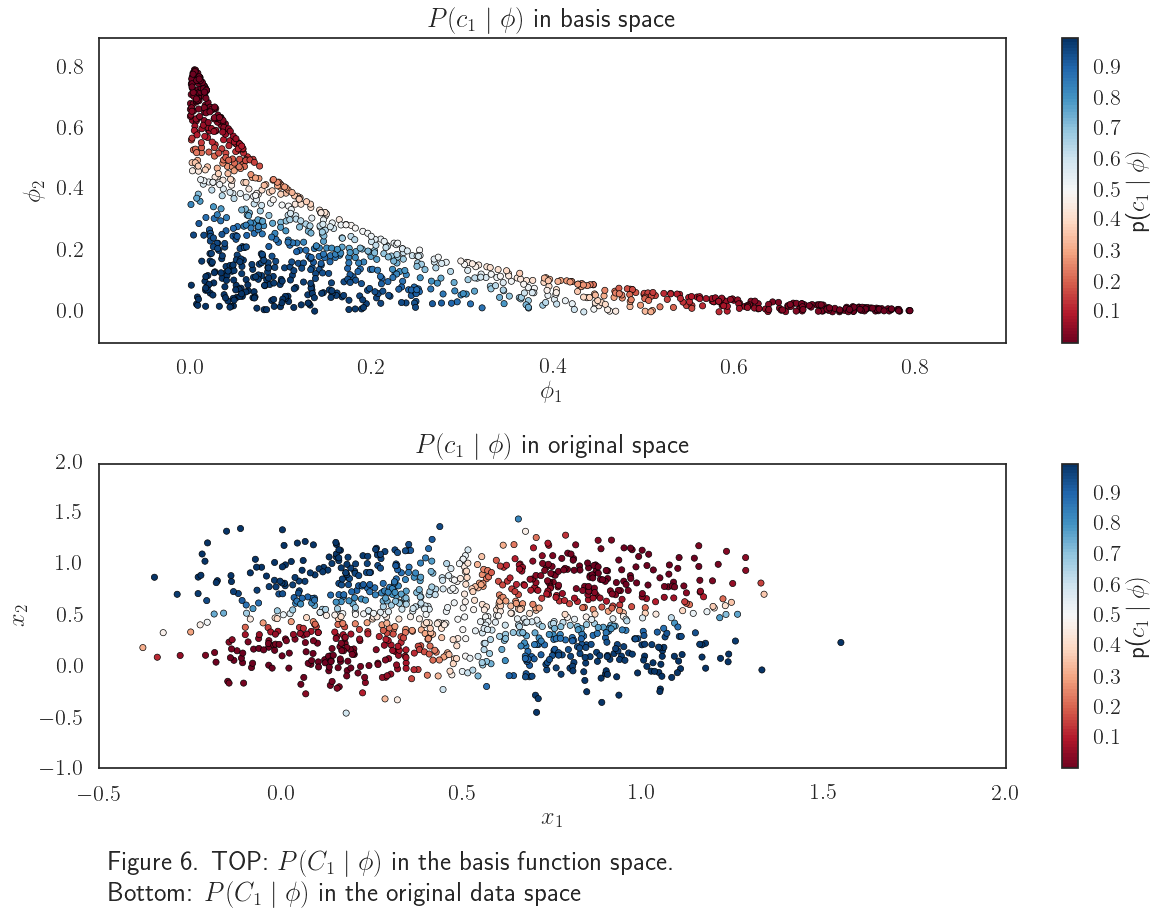

In [22]:
# stack 1 on top op the data [from definition in pdf]
phi =  np.vstack((np.ones(phi1_pdf.shape), phi1_pdf, phi2_pdf))

# run the reweighted least square algorithm
w, i  = RLS(x, c, phi.T, w0)

# show the cross-entropy:
prob_gaussian_after_opt = sigmoid(w.dot(phi))
cross_entropy_gaussian = cross_entropy(prob_gaussian_after_opt, c)
print('Cross-entropy with gaussian basis function = {0}'\
     .format(cross_entropy_gaussian))

fig = figure()
figNum = 6
# optimization results using basis functions
ax = fig.add_subplot(211)
p = ax.scatter(phi1.pdf(x), phi2.pdf(x),\
   c = prob_gaussian_after_opt ,\
               s=20,\
               cmap = cmap_prob);
cb = fig.colorbar(p); cb.set_label('p($c_1 \mid \phi)$')
ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\phi_2$')
ax.set_title('$P(c_1 \mid \phi)$ in basis  space')

ax = fig.add_subplot(212)
ax.set_position((.1, .1, .8, .6))
p = ax.scatter(x[:,0], x[:,1],\
   c = prob_gaussian_after_opt ,\
               s=20,\
               cmap = cmap_prob);
cb = fig.colorbar(p); cb.set_label('p($c_1 \mid \phi)$')

cpt = 'TOP: $P(C_1 \mid \phi)$ in the basis function space.'\
      ' \nBottom:  $P(C_1 \mid \phi)$ in the original data space'
fig.text(.1, -.05, capt_std(figNum) + cpt)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$P(c_1 \mid \phi)$ in original space')
sb.set_context('poster')
fig.tight_layout()
# savefig('Figures/24.png')
show()

We notice a couple of things. First, compared to the logistic regression in the original space, the cross-entropy has dropped dramatically (yet remains fairly high in my opinion) from  692.9693 to 346.50408. However, we are able to separate the classes fairly well.

The cross-entropy remains high even after projecting the data into $\phi_1, \phi_2$, this is reflected by points on the border between the classes having around chance level probability of being asorted to the correct class. Projecting to a differrent space might yield better separation in that new space. This would yield lower cross-entropy and better class separation. 